Intro to statsmodels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm

C:\Users\UDAY\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = sm.datasets.macrodata.load_pandas().data

In [4]:
df.head()


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [5]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [6]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959q1','2009q3'))

In [7]:
df.index = index

In [8]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


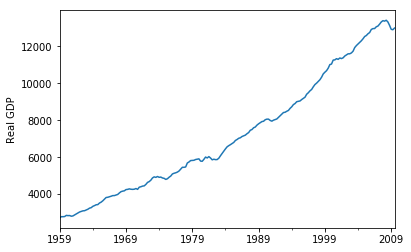

In [9]:
df['realgdp'].plot()
plt.ylabel('Real GDP')

In [10]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])

In [11]:
df['trend'] = gdp_trend

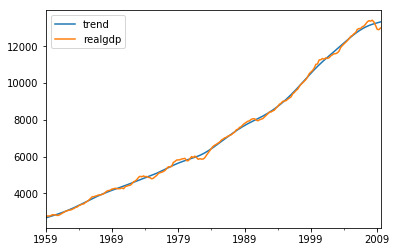

In [12]:
df[['trend','realgdp']].plot()

Thats the end of intro!

Part 2 - ETS Theory

In [13]:
airlines_df = pd.read_csv('../Python-for-Finance-Repo-master/08-Time-Series-Analysis/airline_passengers.csv',index_col = 'Month')

In [14]:
airlines_df.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


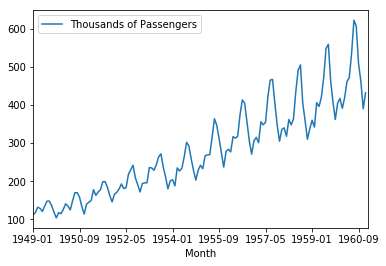

In [15]:
airlines_df.plot()

In [16]:
airlines_df.dropna(inplace=True)
airlines_df.index= pd.to_datetime(airlines_df.index)

In [17]:
airlines_df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

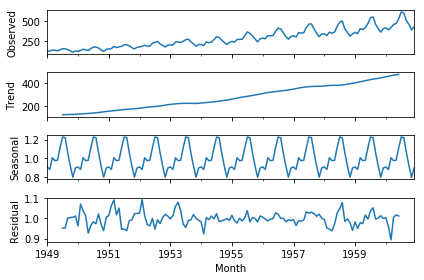

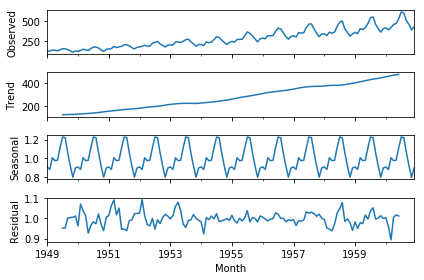

In [19]:
results = seasonal_decompose(airlines_df['Thousands of Passengers'], model = 'multiplicative')
results.plot()

thats the end of basic ETS decomposition

Its time for EWMA(Exponential weighted Moving Average)

In [20]:
airlines_df['SMA-6-Month'] = airlines_df['Thousands of Passengers'].rolling(window=6).mean()
airlines_df['SMA-12-Month'] = airlines_df['Thousands of Passengers'].rolling(window=12).mean()

In [21]:
airlines_df.head()


,Thousands of Passengers,SMA-6-Month,SMA-12-Month
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,NaN,NaN
1949-03-01,132.0,NaN,NaN
1949-04-01,129.0,NaN,NaN
1949-05-01,121.0,NaN,NaN


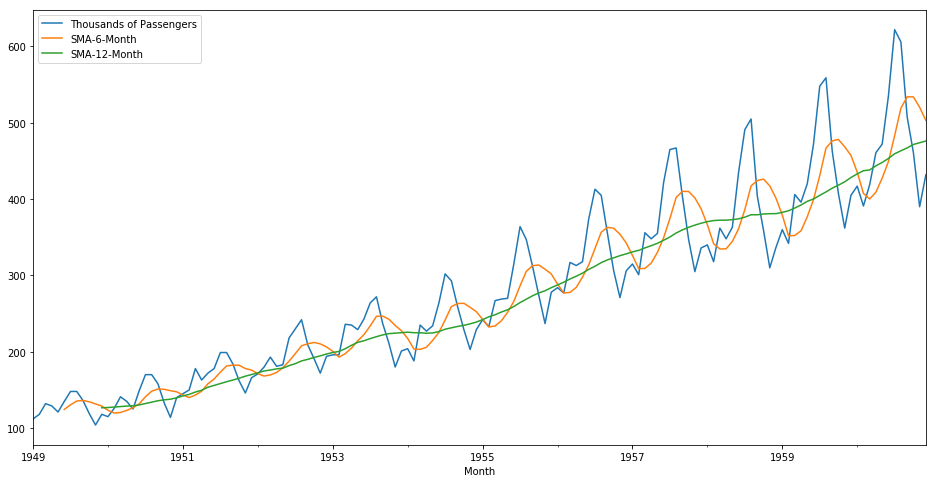

In [22]:
airlines_df.plot(figsize=(16,8))

Now using EWMA

In [23]:
airlines_df['EWMA-12'] = airlines_df['Thousands of Passengers'].ewm(span=12).mean()

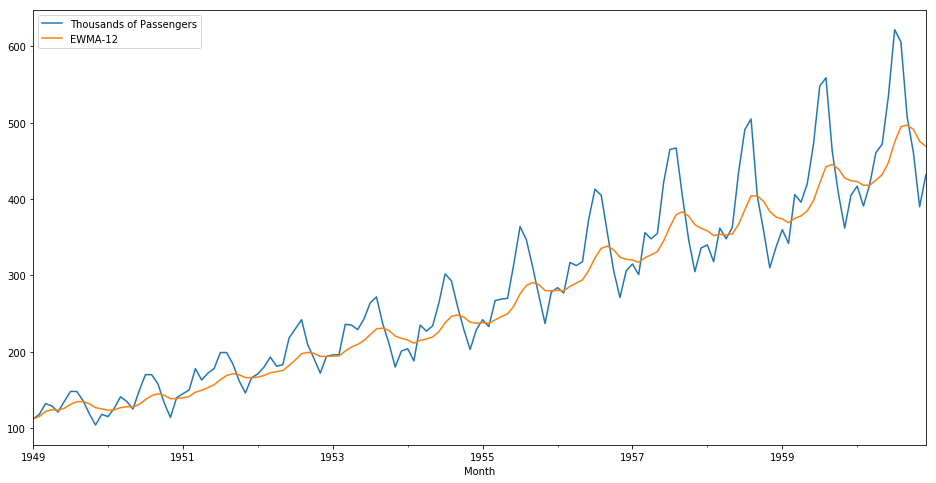

In [24]:
airlines_df[['Thousands of Passengers','EWMA-12']].plot(figsize=(16,8))

thats the end of EWMA, and now its time for the dreaded ARIMA modelling

In [111]:
arima_df = pd.read_csv('../Python-for-Finance-Repo-master/08-Time-Series-Analysis/monthly-milk-production-pounds-p.csv')

In [112]:
arima_df.head()


,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [113]:
arima_df.columns = ['Month', 'Monthly Milk Production in Pounds']

In [114]:
arima_df.head()
arima_df.drop(168, inplace = True)

In [115]:
arima_df['Month'] = pd.to_datetime(arima_df['Month'])

In [116]:
arima_df.set_index('Month',inplace=True)

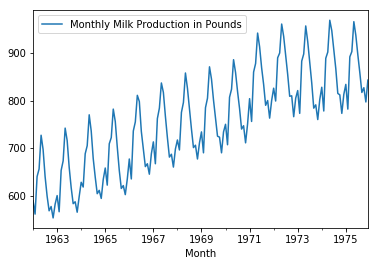

In [117]:
arima_df.plot()

In [118]:
ts = arima_df['Monthly Milk Production in Pounds']

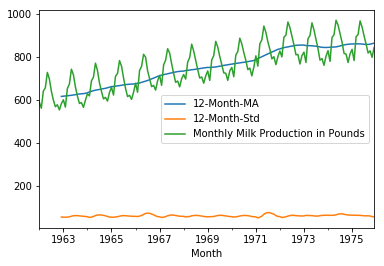

In [119]:
ts.rolling(12).mean().plot(label='12-Month-MA')
ts.rolling(12).std().plot(label='12-Month-Std')
ts.plot()
plt.legend()

Now testing the stationarity of the data using Dickey Fuller test

In [120]:
arima_df.head()

,Monthly Milk Production in Pounds
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [121]:
from statsmodels.tsa.stattools import adfuller

In [122]:
results = adfuller(ts)

In [123]:
results

(-1.3038115874221228,
 0.62742670860303473,
 13,
 154,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [124]:
def adf(ts):
    result = adfuller(ts)
    print("Augmented Dickey Fuller Test")
    labels = ['Test Statistic', 'p-value', 'Number of lags', 'Number of obs']
    
    for value,label in zip(result,labels):
        print(label+" : "+str(value))
    if result[1] <= 0.05:
        print("Reject null hypothesis")
        print("Data is stationary")
    else:
        print("Strong evidence in favour of null hypothesis")
        print("Data is non-stationary")

In [125]:
adf(ts)

Augmented Dickey Fuller Test
Test Statistic : -1.30381158742
p-value : 0.627426708603
Number of lags : 13
Number of obs : 154
Strong evidence in favour of null hypothesis
Data is non-stationary


Performing differencing

In [126]:
arima_df['First Difference'] = ts - ts.shift(1)

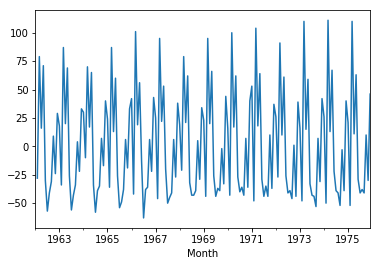

In [127]:
arima_df['First Difference'].plot()

In [128]:
adf(arima_df['First Difference'].dropna())

Augmented Dickey Fuller Test
Test Statistic : -3.05499555865
p-value : 0.0300680040018
Number of lags : 14
Number of obs : 152
Reject null hypothesis
Data is stationary


In [129]:
arima_df['Second Difference'] = arima_df['First Difference'] - arima_df['First Difference'].shift(1)

In [130]:
adf(arima_df['Second Difference'].dropna())

Augmented Dickey Fuller Test
Test Statistic : -14.3278736456
p-value : 1.11269893321e-26
Number of lags : 11
Number of obs : 154
Reject null hypothesis
Data is stationary


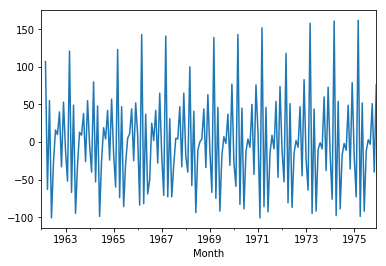

In [131]:
arima_df['Second Difference'].plot()

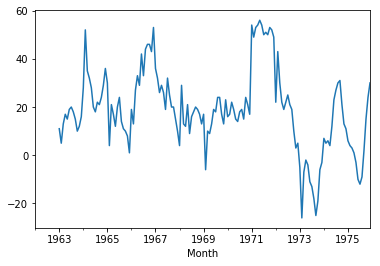

In [132]:
arima_df['Seasonal Difference'] = ts - ts.shift(12)
arima_df['Seasonal Difference'].plot()

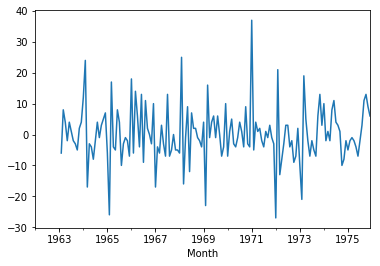

In [133]:
arima_df['Seasonal First Difference'] = arima_df['First Difference'] - arima_df['First Difference'].shift(12)
arima_df['Seasonal First Difference'].plot()

Autocorr and Partial autocorr plots to get AR and MA parts of our ARIMA model

In [134]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

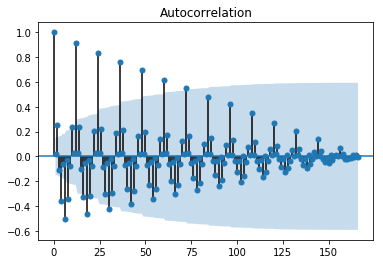

In [135]:
fig_first_diffence = plot_acf(arima_df['First Difference'].dropna())

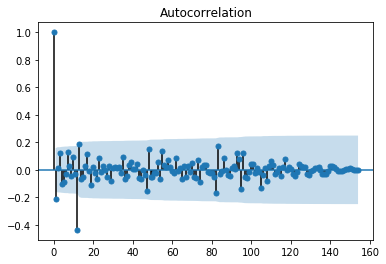

In [136]:
fig_seasonal_first_difference = plot_acf(arima_df['Seasonal First Difference'].dropna())

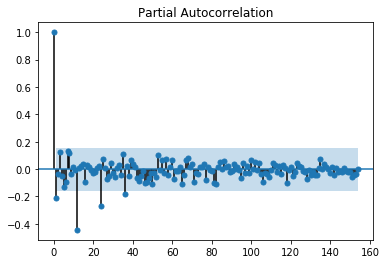

In [137]:
result = plot_pacf(arima_df['Seasonal First Difference'].dropna())

In [138]:
from statsmodels.tsa.arima_model import ARIMA

In [139]:
model = sm.tsa.statespace.SARIMAX(ts, order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

                                   Statespace Model Results                                  
Dep. Variable:     Monthly Milk Production in Pounds   No. Observations:                  168
Model:                SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                               Sat, 17 Mar 2018   AIC                           1074.131
Time:                                       22:27:56   BIC                           1083.503
Sample:                                   01-01-1962   HQIC                          1077.934
                                        - 12-01-1975                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12   

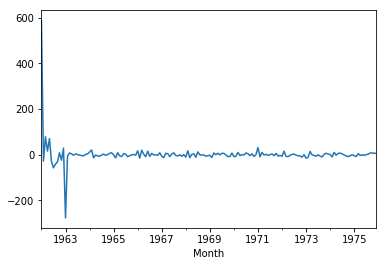

In [140]:
results.resid.plot()

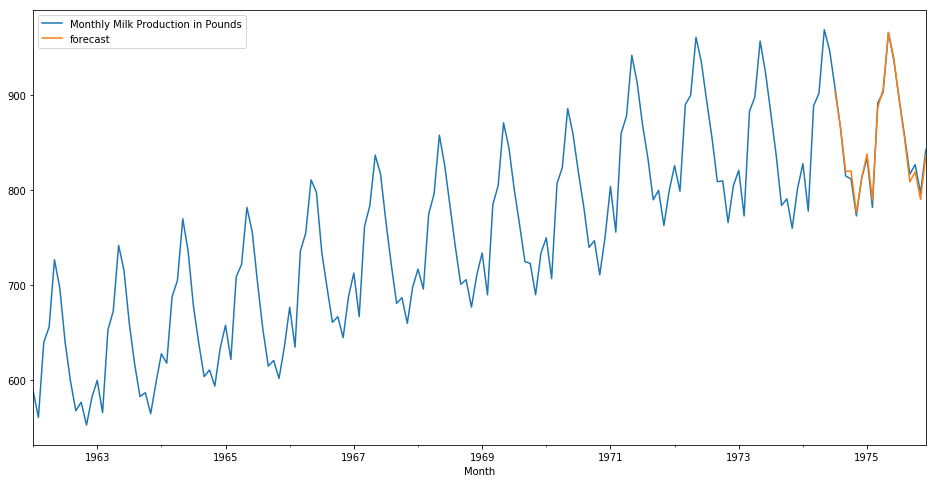

In [141]:
arima_df['forecast'] = results.predict(start=150, end=168)
arima_df[['Monthly Milk Production in Pounds','forecast']].plot(figsize=(16,8))

In [142]:
arima_df.tail()

,Monthly Milk Production in Pounds,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,855.358617
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,808.841269
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323183
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,790.427500
1975-12-01,843.0,46.0,76.0,30.0,6.0,837.063646


In [143]:
from pandas.tseries.offsets import DateOffset

In [150]:
future_dates = [arima_df.index[-1]+ DateOffset(months=x) for x in range(1,24)]

In [151]:
future_df = pd.DataFrame(index = future_dates, columns = arima_df.columns)

In [152]:
future_df.head()

,Monthly Milk Production in Pounds,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
final_df = pd.concat([arima_df,future_df])

In [154]:
final_df.tail()

,Monthly Milk Production in Pounds,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
final_df['forecast'] = results.predict(start=168,end=192)

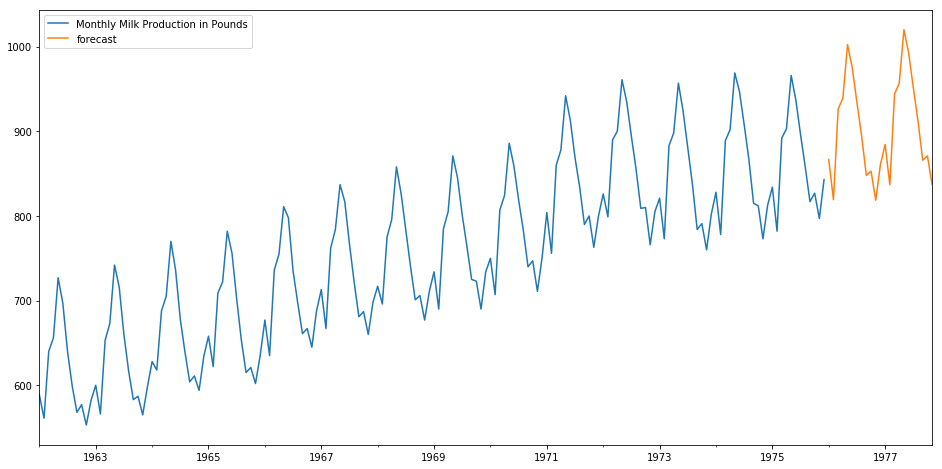

In [157]:
final_df[['Monthly Milk Production in Pounds','forecast']].plot(figsize = (16,8))

Thats it we're done!